In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns
sns.set()

In [3]:
import os
os.chdir("C:/Users/KINJAL/Desktop/EdWisor")

In [4]:
df_train = pd.read_csv('train.csv')
df_pred = pd.read_csv('test.csv')

# Let's start exploring the Dataset!

In [5]:
# first records
df_train.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
# last records
df_train.tail()


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [7]:
# here some info about our df
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [8]:
# here a quick view of our df
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [9]:
# data types and df shape
print('Here are the data types:\n' + str(df_train.dtypes) + '\n')
print('This is the shape of our dataset:\n' + str(df_train.shape))

Here are the data types:
ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

This is the shape of our dataset:
(200000, 202)


In [10]:
# Finding the null values if present:
if True in list(df_train.isnull().any()):
    print('There are some null values here!\nVar_Name; number_of_nulls:')
    print(df_train[df_train.columns[df_train.isnull().any()]].isnull().sum())
else:
    print('No null values in your Dataset!')

No null values in your Dataset!


In [11]:
# putting all the df colname in a list
dfcols = list(df_train.columns)

In [12]:
# exculdig target and index columns
variables = dfcols[2:]

In [13]:
# splitting the list every n elements:
n = 10
chunks = [variables[x:x + n] for x in range(0, len(variables), n)]

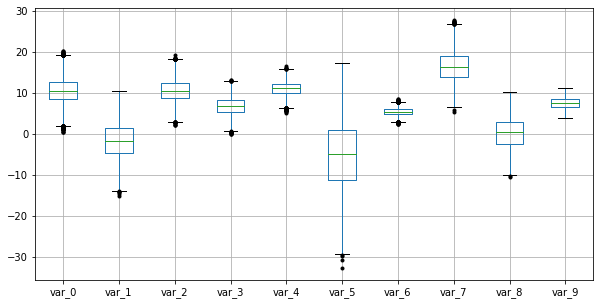

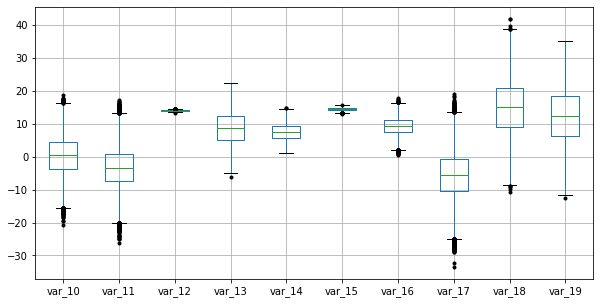

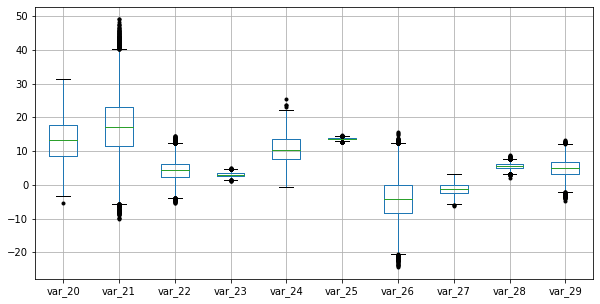

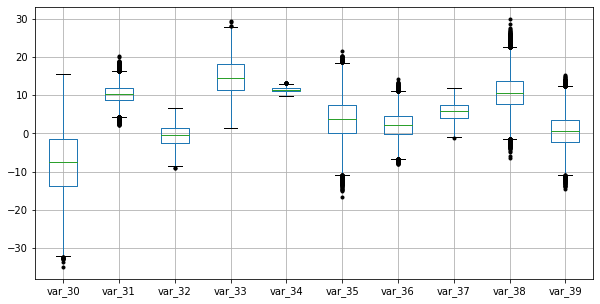

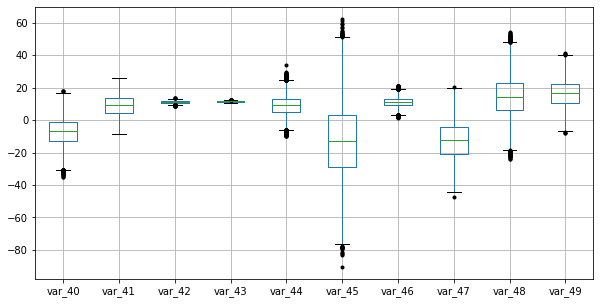

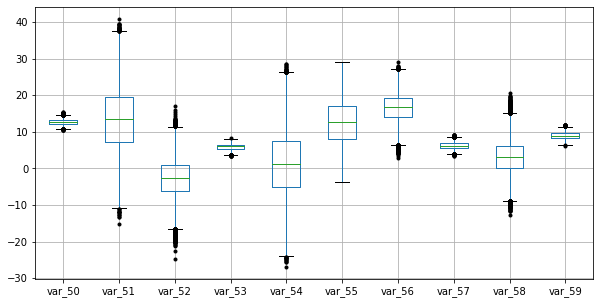

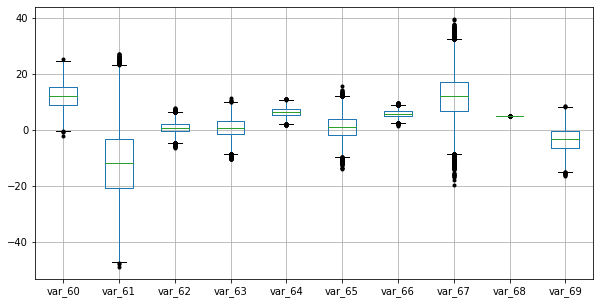

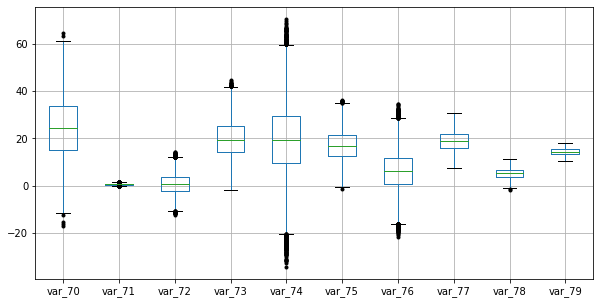

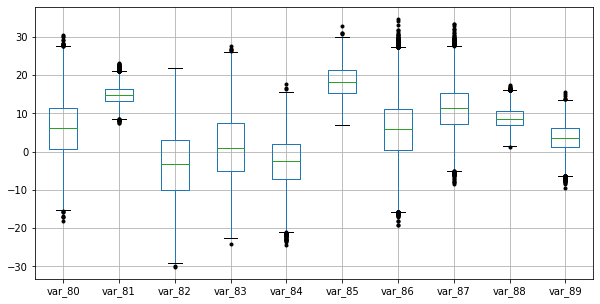

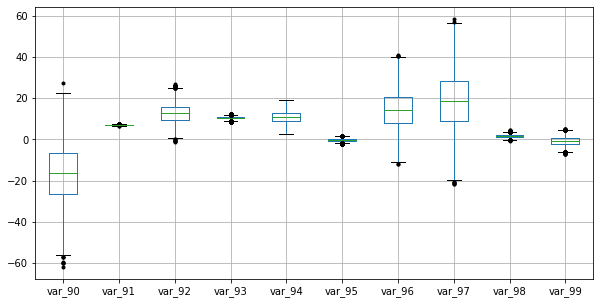

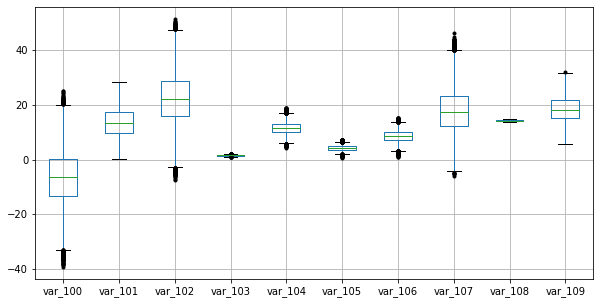

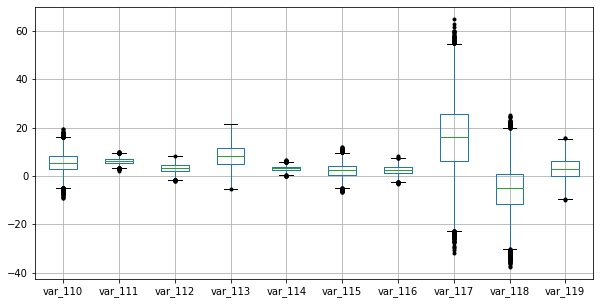

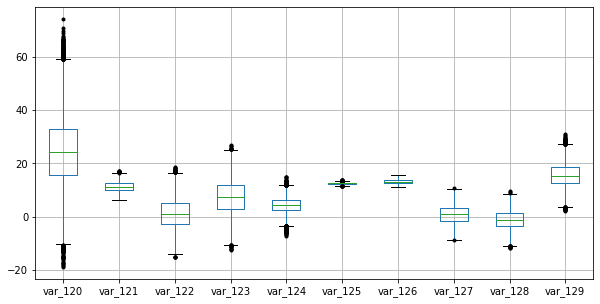

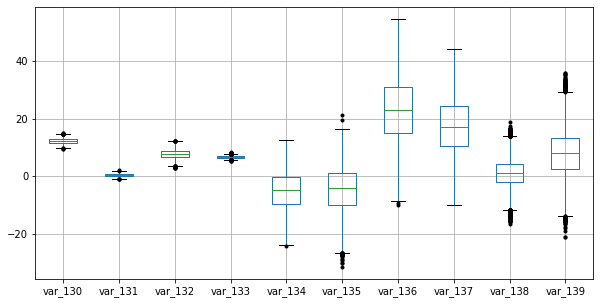

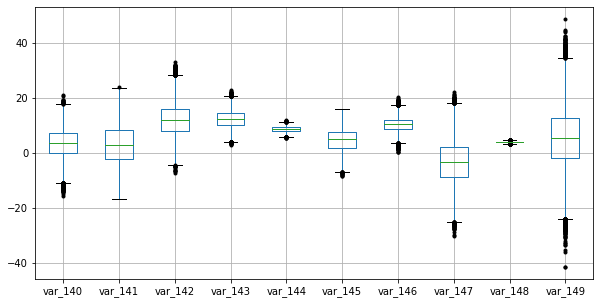

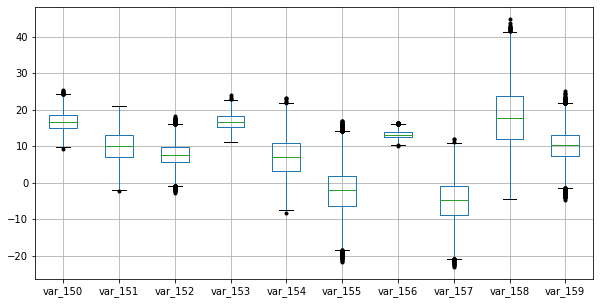

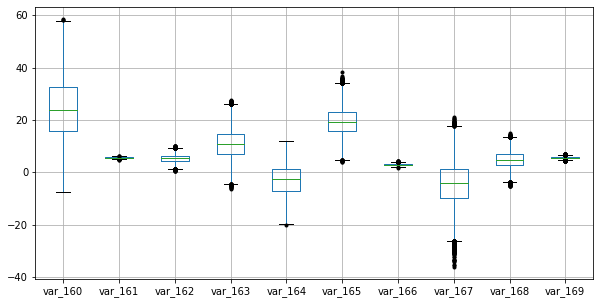

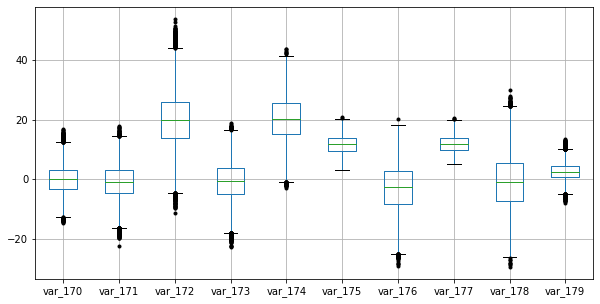

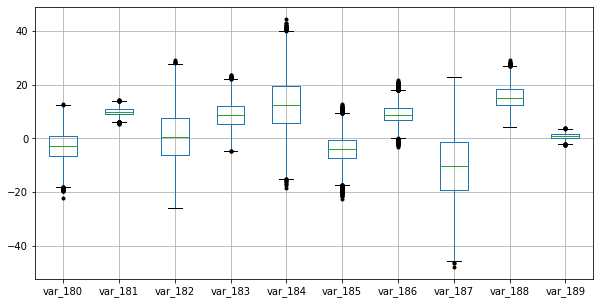

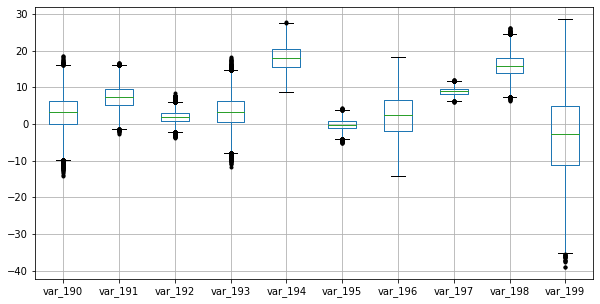

In [14]:
# displaying a boxplot every n columns:
for i in chunks:
    plt.show(df_train.boxplot(column = i, sym='k.', figsize=(10,5)))

# Density Graphs

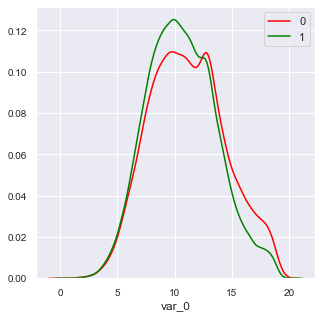

In [17]:
fig = plt.figure(figsize=(5,5))
sns.distplot(df_train[df_train['target']>0]['var_0'], hist=False,label='0', color='red')
sns.distplot(df_train[df_train['target']==0]['var_0'], hist=False,label='1', color='green')
plt.xlabel('var_0', fontsize=12)
locs, labels = plt.xticks()
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=10)

In [18]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1, color='red')
        sns.distplot(df2[feature], hist=False,label=label2, color='green')
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

<Figure size 432x288 with 0 Axes>

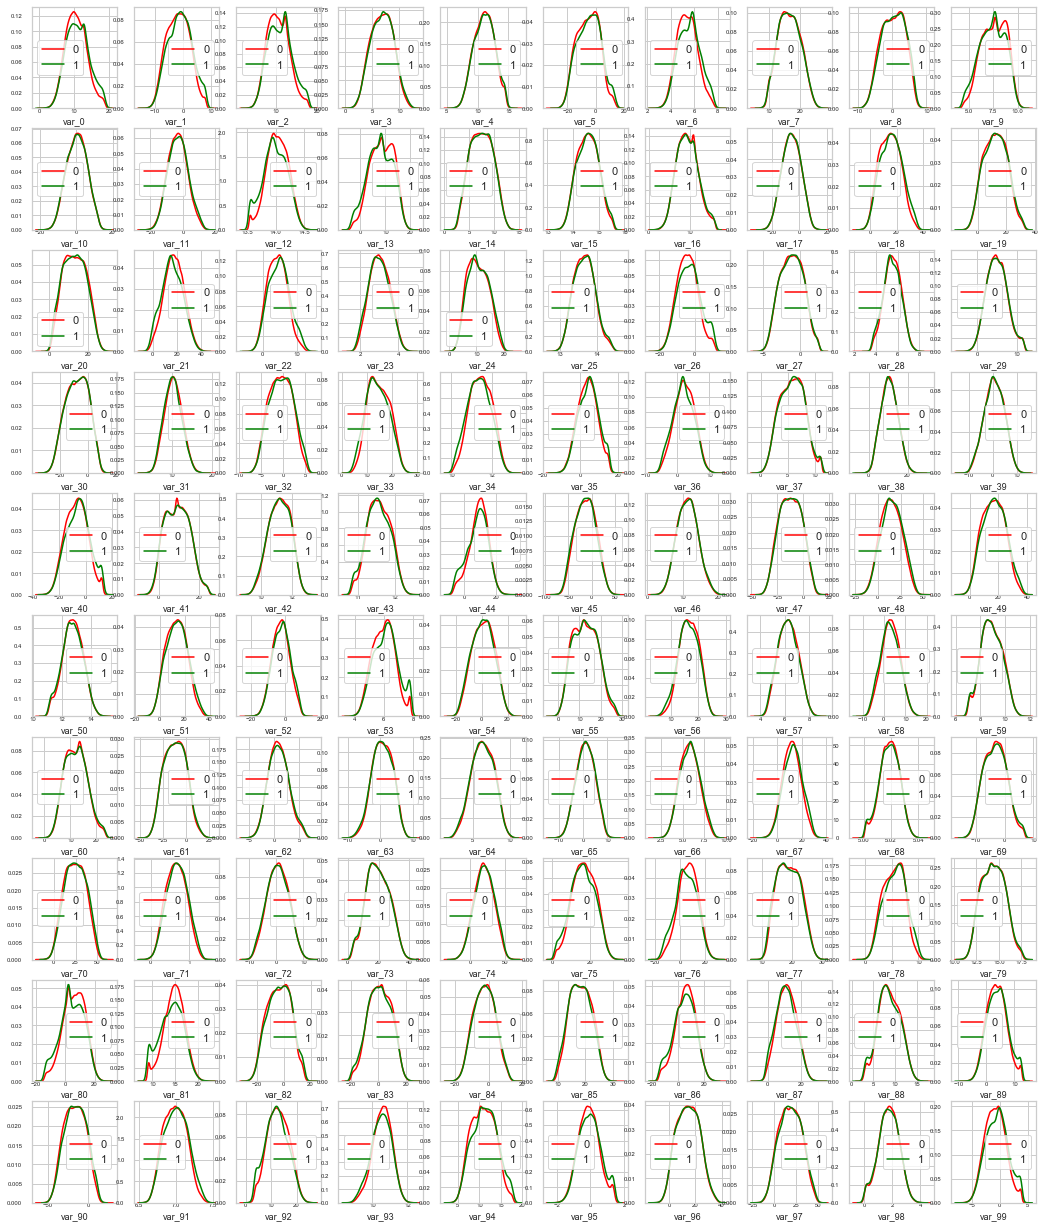

In [19]:
t0 = df_train.loc[df_train['target'] == 0]
t1 = df_train.loc[df_train['target'] == 1]
features = df_train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

In [7]:
#Seperating X and Y
x_col = [x for x in df_train.columns if x != 'target' and x != 'ID_code']
y_col = 'target'


In [8]:

X_train = df_train[x_col]
y_train = df_train[y_col]

X_pred = df_pred[x_col]

In [9]:
#Preprocessing
#replacing null with mean
X_train = X_train.apply(lambda x: x.fillna(x.mean()),axis=0)
X_pred = X_pred.apply(lambda x: x.fillna(x.mean()),axis=0)

#Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=42)


In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
names = ["Decision Tree", 
         "Random Forest",
         "Naive Bayes", 
         "Logistic Regression"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    GaussianNB(),
    LogisticRegression()]



store_classifiers = {}
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    store_classifiers[name]=clf
    

C:\Users\KINJAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
for name,clf in store_classifiers.items():
    y_pred = clf.predict(X_test)
    print(name)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    prf1_score = precision_recall_fscore_support(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    print('Accuracy: ' , accuracy)
    print('Balanced Accuracy: ' ,balanced_accuracy)
    print('Precision/Recall/F1 score: ' ,prf1_score)
    print('Confusion Matrix: ' ,conf_matrix)
    print('AUC: ' ,auc_score)

Decision Tree
Accuracy:  0.89665
Balanced Accuracy:  0.5053228843744499
Precision/Recall/F1 score:  (array([0.89855727, 0.37241379]), array([0.99746539, 0.01318038]), array([0.94543151, 0.02545969]), array([35903,  4097], dtype=int64))
Confusion Matrix:  [[35812    91]
 [ 4043    54]]
AUC:  0.5053228843744499
Random Forest
Accuracy:  0.897575
Balanced Accuracy:  0.5
Precision/Recall/F1 score:  (array([0.897575, 0.      ]), array([1., 0.]), array([0.94602321, 0.        ]), array([35903,  4097], dtype=int64))
Confusion Matrix:  [[35903     0]
 [ 4097     0]]
AUC:  0.5


C:\ProgramData\Anaconda3\envs\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes
Accuracy:  0.9209
Balanced Accuracy:  0.6782998091343821
Precision/Recall/F1 score:  (array([0.93219802, 0.71952941]), array([0.98339972, 0.3731999 ]), array([0.95711459, 0.49148184]), array([35903,  4097], dtype=int64))
Confusion Matrix:  [[35307   596]
 [ 2568  1529]]
AUC:  0.6782998091343821
Logistic Regression
Accuracy:  0.9131
Balanced Accuracy:  0.6278981597630602
Precision/Recall/F1 score:  (array([0.92206169, 0.69589905]), array([0.98657494, 0.26922138]), array([0.95322802, 0.38824358]), array([35903,  4097], dtype=int64))
Confusion Matrix:  [[35421   482]
 [ 2994  1103]]
AUC:  0.6278981597630602


In [12]:
#Running results intially without balancing

#Trying to Balance using Stratified Sampling
from sklearn.model_selection import StratifiedKFold
X_train = df_train[x_col]
y_train = df_train[y_col]

#Preprocessing
#replacing null with mean
X_train = X_train.apply(lambda x: x.fillna(x.mean()),axis=0)
#Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X = np.array(X_train)
Y = np.array(y_train)
skf = StratifiedKFold(n_splits=2)

print(len(X_train))

for train_index, test_index in skf.split(X,Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    



X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



200000
TRAIN: [ 99964  99965  99966 ... 199997 199998 199999] TEST: [     0      1      2 ... 100401 100411 100421]
TRAIN: [     0      1      2 ... 100401 100411 100421] TEST: [ 99964  99965  99966 ... 199997 199998 199999]


In [13]:
names = [
         "Decision Tree", 
         "Random Forest",
         "Naive Bayes", 
         "Logistic Regression"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    GaussianNB(),
    LogisticRegression()]



store_classifiers = {}
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    store_classifiers[name]=clf
    

C:\Users\KINJAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
for name,clf in store_classifiers.items():
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    prf1_score = precision_recall_fscore_support(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    print(name)
    print('Accuracy: ' , accuracy)
    print('Balanced Accuracy: ' ,balanced_accuracy)
    print('Precision/Recall/F1 score: ' ,prf1_score)
    print('Confusion Matrix: ' ,conf_matrix)
    print('AUC: ' ,auc_score)

Decision Tree
Accuracy:  0.89824
Balanced Accuracy:  0.5075590136839453
Precision/Recall/F1 score:  (array([0.90088343, 0.37325349]), array([0.99650921, 0.01860882]), array([0.94628662, 0.03545024]), array([89951, 10049], dtype=int64))
Confusion Matrix:  [[89637   314]
 [ 9862   187]]
AUC:  0.5075590136839453


C:\Users\KINJAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Random Forest
Accuracy:  0.89951
Balanced Accuracy:  0.5
Precision/Recall/F1 score:  (array([0.89951, 0.     ]), array([1., 0.]), array([0.94709688, 0.        ]), array([89951, 10049], dtype=int64))
Confusion Matrix:  [[89951     0]
 [10049     0]]
AUC:  0.5
Naive Bayes
Accuracy:  0.9218
Balanced Accuracy:  0.6760096414496295
Precision/Recall/F1 score:  (array([0.93306617, 0.71536232]), array([0.98362442, 0.36839487]), array([0.95767849, 0.48633736]), array([89951, 10049], dtype=int64))
Confusion Matrix:  [[88478  1473]
 [ 6347  3702]]
AUC:  0.6760096414496296
Logistic Regression
Accuracy:  0.91442
Balanced Accuracy:  0.6272678191322614
Precision/Recall/F1 score:  (array([0.9234499 , 0.69149756]), array([0.98664829, 0.26788735]), array([0.95400359, 0.38617128]), array([89951, 10049], dtype=int64))
Confusion Matrix:  [[88750  1201]
 [ 7357  2692]]
AUC:  0.6272678191322614


In [17]:
#Trying another algorithm 
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


X_train = df_train[x_col]
y_train = df_train[y_col]

X_pred = df_pred[x_col]
#replacing null with mean
X_train = X_train.apply(lambda x: x.fillna(x.mean()),axis=0)
#Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=42)


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


scp = scp = len(df_train[(df_train[y_col] == 0)])/len(df_train[(df_train[y_col] == 1)])
names = [
         
        "xgboost"]




classifiers = [

    XGBClassifier(
        learning_rate=0.1,
        n_estimators=50,
        booster = 'gbtree',
        max_depth=8,
        max_leaves = 15,
        min_child_weight=16,
        subsample = 0.7,
        gamma=0,
        colsample_bytree=0.8,
        objective = 'binary:logitraw',
        tree = 'hist',
        grow_policy = 'lossguide',
        
        scale_pos_weight = 1,n_jobs=-1,
        seed=500)
    ]



store_classifiers = {}
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    store_classifiers[name]=clf

ModuleNotFoundError: No module named 'xgboost'

In [18]:
for name,clf in store_classifiers.items():
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    prf1_score = precision_recall_fscore_support(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    print(name)
    print('Accuracy: ' , accuracy)
    print('Balanced Accuracy: ' ,balanced_accuracy)
    print('Precision/Recall/F1 score: ' ,prf1_score)
    print('Confusion Matrix: ' ,conf_matrix)
    print('AUC: ' ,auc_score)

Decision Tree
Accuracy:  0.89824
Balanced Accuracy:  0.5075590136839453
Precision/Recall/F1 score:  (array([0.90088343, 0.37325349]), array([0.99650921, 0.01860882]), array([0.94628662, 0.03545024]), array([89951, 10049], dtype=int64))
Confusion Matrix:  [[89637   314]
 [ 9862   187]]
AUC:  0.5075590136839453


C:\Users\KINJAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Random Forest
Accuracy:  0.89951
Balanced Accuracy:  0.5
Precision/Recall/F1 score:  (array([0.89951, 0.     ]), array([1., 0.]), array([0.94709688, 0.        ]), array([89951, 10049], dtype=int64))
Confusion Matrix:  [[89951     0]
 [10049     0]]
AUC:  0.5
Naive Bayes
Accuracy:  0.9218
Balanced Accuracy:  0.6760096414496295
Precision/Recall/F1 score:  (array([0.93306617, 0.71536232]), array([0.98362442, 0.36839487]), array([0.95767849, 0.48633736]), array([89951, 10049], dtype=int64))
Confusion Matrix:  [[88478  1473]
 [ 6347  3702]]
AUC:  0.6760096414496296
Logistic Regression
Accuracy:  0.91442
Balanced Accuracy:  0.6272678191322614
Precision/Recall/F1 score:  (array([0.9234499 , 0.69149756]), array([0.98664829, 0.26788735]), array([0.95400359, 0.38617128]), array([89951, 10049], dtype=int64))
Confusion Matrix:  [[88750  1201]
 [ 7357  2692]]
AUC:  0.6272678191322614


In [ ]:
#Conclusion - As per the current experiments Naive Bayes model gives the best AUC for this unbalanced dataset
#things that can be done to improve the model performance are -
#1. Feature Engineering
#2. Optimizing the model to find for hyper parameter tuning
#3. Create the current datastructure into more statistical format
#4. Remove the least correlated features and similarly correlated features can be merged to single feature


In [19]:
#Applying Tensorflow Models
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [20]:
len(df_train)

200000

In [21]:
len(df_train)

200000

In [22]:
from sklearn.model_selection import KFold

X_train = df_train[x_col]
y_train = df_train[y_col]

X_pred = df_pred[x_col]
#replacing null with mean
X_train = X_train.apply(lambda x: x.fillna(x.mean()),axis=0)
#Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
                               
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=42)


In [23]:
def kfold_xgboost(train_df, test_df,y_col, debug = False):
    oof_preds_xgb = np.zeros(train_df.shape[0])
    sub_preds_xgb = np.zeros(test_df.shape[0])
    xgb_params = {
    'objective': 'binary:logitraw',
    'eval_metric': 'auc',
    'booster': 'gbtree',
    'n_jobs': 4,
    'tree_method': 'hist',
    'eta': 0.2,
    'grow_policy': 'lossguide',
    'max_delta_step': 2,
    'seed': 538,
    'colsample_bylevel': 0.9,
    'colsample_bytree': 0.8,
    'gamma': 1.0,
    'learning_rate': 0.1,
    'max_bin': 64,
    'max_depth': 8,
    'max_leaves': 15,
    'min_child_weight': 16,
    'reg_alpha': 1e-06,
    'reg_lambda': 1.0,
    'subsample': 0.7}
    for fold_, (train_idx, valid_idx) in enumerate(fold_xgb.split(train_df.values)):
        train_x, train_y = train_df.iloc[train_idx], train[y_col].iloc[train_idx]
        valid_x, valid_y = train_df.iloc[valid_idx], train[y_col].iloc[valid_idx]
        print("fold n °{}".format(fold_))
        trn_Data = xgb.DMatrix(train_x, label = train_y)
        val_Data = xgb.DMatrix(valid_x, label = valid_y)
        watchlist = [(trn_Data, "Train"), (val_Data, "Valid")]
        print("xgb" + str(fold_) + "-" * 50)
        num_rounds = 10000
        xgb_model = xgb.train(xgb_params, trn_Data,num_rounds,watchlist,early_stopping_rounds=50, verbose_eval= 1000)
        oof_preds_xgb[valid_idx] = xgb_model.predict(xgb.DMatrix(train_df.iloc[valid_idx][feats]), ntree_limit = xgb_model.best_ntree_limit + 50)
        sub_preds_xgb = xgb_model.predict(xgb.DMatrix(test_df[feats]),ntree_limit= xgb_model.best_ntree_limit)/fold_xgb.n_splits
        
        del train_idx,valid_idx
        gc.collect()
    xgb.plot_importance(xgb_model)
    #plt.savefig("importance.png")
    return sub_preds_xgb

fold_xgb = KFold(n_splits=5, shuffle=False, random_state=114)
Preds_xgb = kfold_xgboost(df_train[x_col+[y_col]], X_test[x_col],y_col, debug = False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [24]:
X_test

array([[ 0.10653985, -0.70986522, -0.62440819, ..., -0.07959618,
         0.39036997,  1.16358974],
       [ 0.71294569, -1.12521975, -1.4522738 , ...,  0.90866021,
        -0.34441767, -0.03737914],
       [ 0.82327307,  0.19585556,  1.0427207 , ..., -0.28835829,
         1.60746578, -0.20042779],
       ...,
       [ 1.19589934,  1.39532695,  0.50521202, ..., -0.07200088,
         1.18995469, -1.26433962],
       [ 1.54178258, -0.00280944,  0.92226877, ..., -1.97917948,
        -1.08418715,  0.41447034],
       [-0.28072438,  0.42466845,  0.87966946, ...,  0.10052082,
        -0.53611873, -1.21575747]])